In [23]:
# Célula 1 - Importação de bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
from google.colab import files

In [24]:
# Célula 2 - Criar estrutura de pastas
!mkdir -p /content/img
print("Pasta 'img' criada!")

# Célula 3 - Upload das imagens (execute esta célula e faça o upload das 3 imagens)
uploaded = files.upload()

# Mover as imagens para a pasta img
for filename in uploaded.keys():
    !mv "{filename}" "/content/img/{filename}"
    print(f"Imagem {filename} movida para /content/img/")

Pasta 'img' criada!


In [25]:
# Verificar se as imagens estão na pasta
!ls /content/img/

cena_natural.jpg  imagem_industrial.jpg  imagem_medica.jpg


In [26]:
# Célula 4 - Verificar imagens disponíveis
print("Conteudo da pasta /content/img/:")
!ls -la /content/img/

# Lista de imagens a processar
imagens = [
    "/content/img/cena_natural.jpg",
    "/content/img/imagem_medica.jpg",
    "/content/img/imagem_industrial.jpg"
]

nomes = ["Cena Natural", "Imagem Medica", "Imagem Industrial"]

print("\nImagens encontradas:")
for i, caminho in enumerate(imagens):
    if os.path.exists(caminho):
        print(f"OK - {nomes[i]}: {caminho}")
    else:
        print(f"FALHA - {nomes[i]}: {caminho}")

Conteudo da pasta /content/img/:
total 992
drwxr-xr-x 2 root root   4096 Nov  4 20:51 .
drwxr-xr-x 1 root root   4096 Nov  4 20:51 ..
-rw-r--r-- 1 root root 628333 Nov  4 20:50 cena_natural.jpg
-rw-r--r-- 1 root root 191092 Nov  4 20:50 imagem_industrial.jpg
-rw-r--r-- 1 root root 183105 Nov  4 20:51 imagem_medica.jpg

Imagens encontradas:
OK - Cena Natural: /content/img/cena_natural.jpg
OK - Imagem Medica: /content/img/imagem_medica.jpg
OK - Imagem Industrial: /content/img/imagem_industrial.jpg


In [27]:
# Célula 5 - FUNCAO CANNY
def aplicar_canny(imagem_path, minVal=100, maxVal=200):
    """
    Aplica detecao de bordas Canny
    """
    # Carrega a imagem do caminho especificado em escala de cinza (0 = cv2.IMREAD_GRAYSCALE)
    # A imagem é convertida para ter apenas um canal de intensidade (0-255)
    img = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Erro ao carregar imagem: {imagem_path}")

    # Aplica o algoritmo Canny para detecção de bordas:
    # - minVal: limiar inferior - bordas com gradiente abaixo disso são descartadas
    # - maxVal: limiar superior - bordas com gradiente acima disso são consideradas fortes
    # - Bordas entre minVal e maxVal são mantidas apenas se conectadas a bordas fortes
    # O resultado é uma imagem binária onde pixels brancos (255) representam bordas
    edges = cv2.Canny(img, minVal, maxVal)

    # Retorna a imagem original em escala de cinza e a imagem com bordas detectadas
    return img, edges

print("Funcao Canny definida")

Funcao Canny definida


In [28]:
# Célula 6 - FUNCAO K-MEANS
def aplicar_kmeans(imagem_path, k=4):
    """
    Aplica segmentacao K-means
    """

    # Carrega a imagem colorida (padrão BGR - Blue, Green, Red)
    img = cv2.imread(imagem_path)
    if img is None:
        raise ValueError(f"Erro ao carregar imagem: {imagem_path}")

    # Converte a imagem de BGR (formato OpenCV) para RGB (formato padrão para exibição)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    # Redimensiona a imagem de uma matriz 3D (altura, largura, canais) para 2D (pixels, canais)
    # Cada linha representa um pixel com seus valores RGB
    # -1 no reshape significa que a dimensão é calculada automaticamente
    pixel_values = img_rgb.reshape((-1, 3))

    # Converte os valores dos pixels para float32, que é necessário para o algoritmo K-means do OpenCV
    pixel_values = np.float32(pixel_values)

    # - cv2.TERM_CRITERIA_EPS: para quando a precisão é atingida
    # - cv2.TERM_CRITERIA_MAX_ITER: para quando o número máximo de iterações é atingido
    # - 100: número máximo de iterações
    # - 0.2: precisão - para quando os centróides mudam menos que este valor
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Aplica o algoritmo K-means:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)

    # Mapeia cada pixel para o valor do centróide do seu cluster
    # labels.flatten() transforma a matriz de rótulos em um array 1D
    # centers[labels.flatten()] pega o valor do centróide correspondente a cada rótulo
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape(img_rgb.shape)

    return img_rgb, segmented_image

print("Funcao K-means definida")

Funcao K-means definida


PROCESSANDO IMAGEM 1: CENA NATURAL


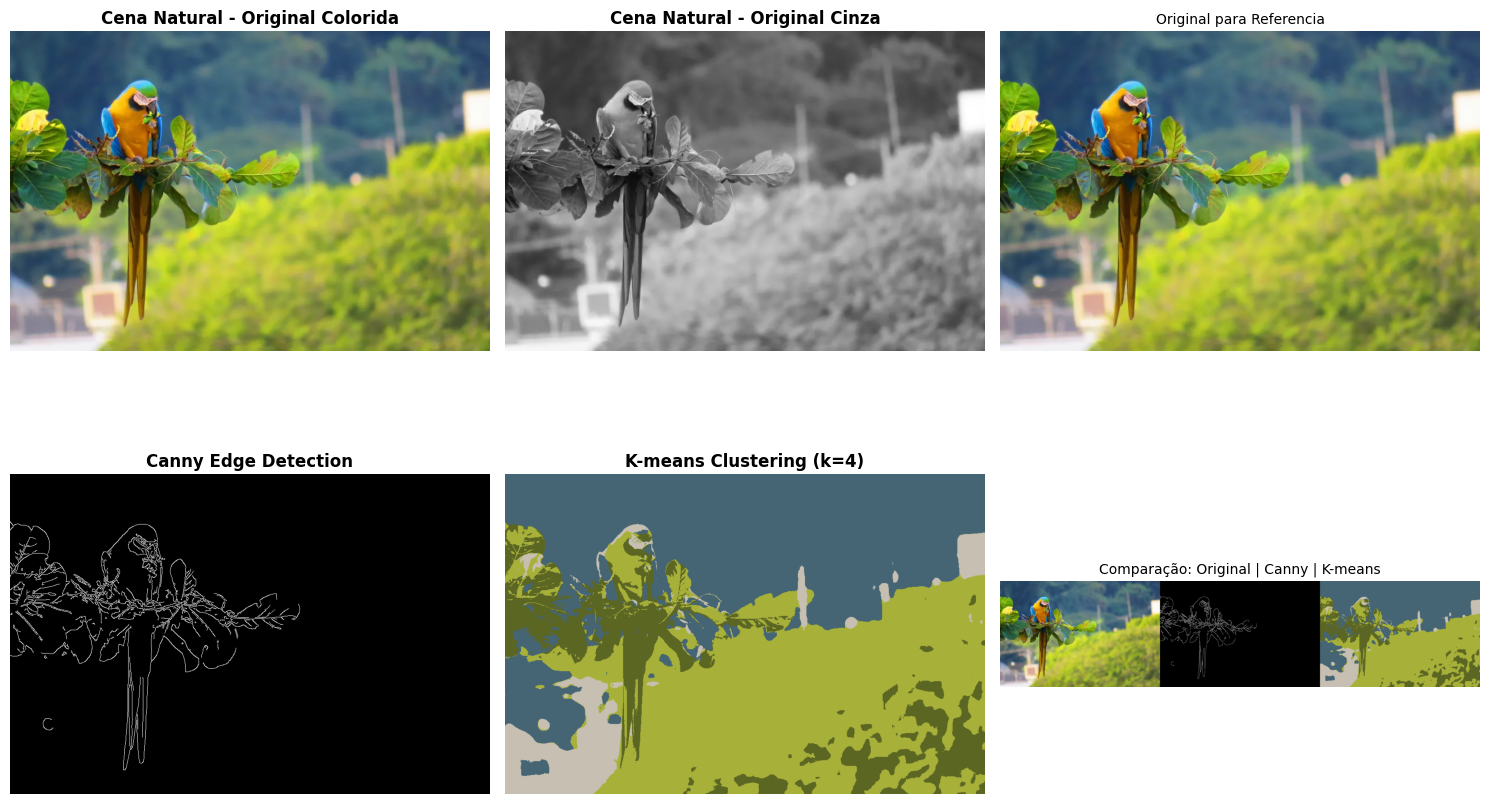

  
ESTATISTICAS - CENA NATURAL:
Canny:
  Pixels de borda: O algoritmo encontrou 12,352 pixels que ele considera como 'bordas' na imagem
  Densidade de bordas: 1.82% da imagem total foi classificada como borda
K-means:
  Cores unicas: A imagem segmentada agora tem apenas 4 cores
  Clusters utilizados: O algoritmo realmente usou todos os 4 grupos configurados


In [29]:
# Célula 7 - PROCESSAR IMAGEM 1: CENA NATURAL
print("PROCESSANDO IMAGEM 1: CENA NATURAL")
print("=" * 50)

caminho_imagem = "/content/img/cena_natural.jpg"

if os.path.exists(caminho_imagem):
    # Aplicar Canny
    img_original_canny, img_canny = aplicar_canny(caminho_imagem)

    # Aplicar K-means
    img_original_kmeans, img_kmeans = aplicar_kmeans(caminho_imagem, k=4)

    # Plotar resultados
    plt.figure(figsize=(15, 10))

    # Original
    plt.subplot(2, 3, 1)
    plt.imshow(img_original_kmeans)
    plt.title('Cena Natural - Original Colorida', fontsize=12, fontweight='bold')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(img_original_canny, cmap='gray')
    plt.title('Cena Natural - Original Cinza', fontsize=12, fontweight='bold')
    plt.axis('off')

    # Canny
    plt.subplot(2, 3, 4)
    plt.imshow(img_canny, cmap='gray')
    plt.title('Canny Edge Detection', fontsize=12, fontweight='bold')
    plt.axis('off')

    # K-means
    plt.subplot(2, 3, 5)
    plt.imshow(img_kmeans)
    plt.title('K-means Clustering (k=4)', fontsize=12, fontweight='bold')
    plt.axis('off')

    # Comparacao lado a lado
    plt.subplot(2, 3, 3)
    plt.imshow(img_original_kmeans)
    plt.title('Original para Referencia', fontsize=10)
    plt.axis('off')

    plt.subplot(2, 3, 6)
    # Criar imagem comparativa
    comparativo = np.hstack([img_original_kmeans,
                           cv2.cvtColor(img_canny, cv2.COLOR_GRAY2RGB),
                           img_kmeans])
    plt.imshow(comparativo)
    plt.title('Comparação: Original | Canny | K-means', fontsize=10)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Estatisticas
    bordas_canny = np.sum(img_canny > 0)
    total_pixels = img_canny.size
    percentual_bordas = (bordas_canny / total_pixels) * 100
    cores_kmeans = len(np.unique(img_kmeans.reshape(-1, img_kmeans.shape[2]), axis=0))

    print("  ")
    print("ESTATISTICAS - CENA NATURAL:")
    print(f"Canny:")
    print(f"  Pixels de borda: O algoritmo encontrou {bordas_canny:,} pixels que ele considera como 'bordas' na imagem")
    print(f"  Densidade de bordas: {percentual_bordas:.2f}% da imagem total foi classificada como borda")
    print(f"K-means:")
    print(f"  Cores unicas: A imagem segmentada agora tem apenas {cores_kmeans} cores")
    print(f"  Clusters utilizados: O algoritmo realmente usou todos os 4 grupos configurados")

else:
    print("Imagem cena_natural.jpg nao encontrada")

PROCESSANDO IMAGEM 2: IMAGEM MEDICA


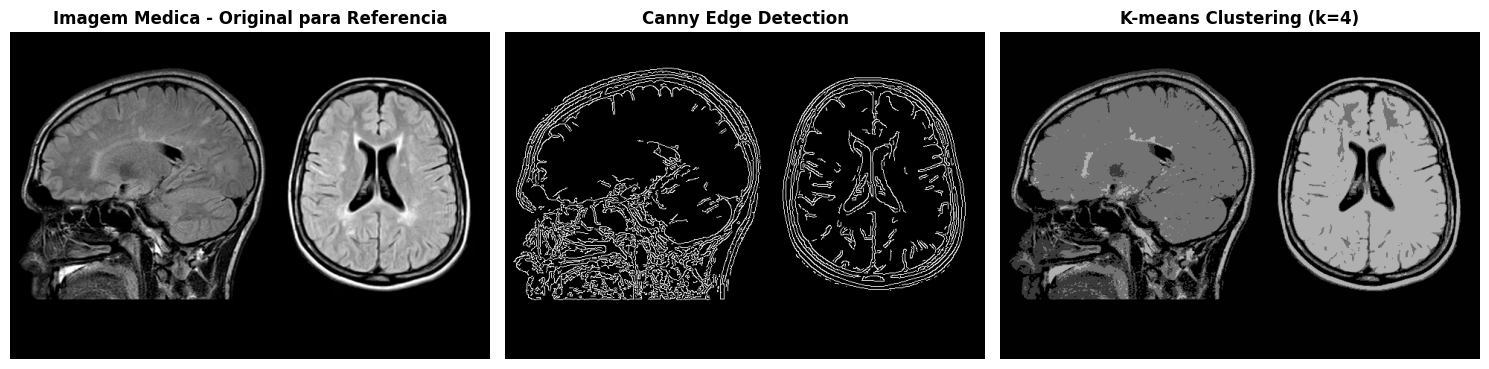

  
ESTATISTICAS - IMAGEM MEDICA:
Canny:
  Pixels de borda: O algoritmo encontrou 22,657 pixels que ele considera como 'bordas' na imagem
  Densidade de bordas: 8.00% da imagem total foi classificada como borda
K-means:
  Cores unicas: A imagem segmentada agora tem apenas 4 cores
  Clusters utilizados: O algoritmo realmente usou todos os 4 grupos configurados


In [30]:
# Célula 8 - PROCESSAR IMAGEM 2: IMAGEM MEDICA
print("PROCESSANDO IMAGEM 2: IMAGEM MEDICA")
print("=" * 50)

caminho_imagem = "/content/img/imagem_medica.jpg"

if os.path.exists(caminho_imagem):
    # Aplicar Canny
    img_original_canny, img_canny = aplicar_canny(caminho_imagem)

    # Aplicar K-means
    img_original_kmeans, img_kmeans = aplicar_kmeans(caminho_imagem, k=4)

    # Plotar resultados
    plt.figure(figsize=(15, 10))

    # Original
    plt.subplot(2, 3, 1)
    plt.imshow(img_original_kmeans)
    plt.title('Imagem Medica - Original para Referencia', fontsize=12, fontweight='bold')
    plt.axis('off')

    # Canny
    plt.subplot(2, 3, 2)
    plt.imshow(img_canny, cmap='gray')
    plt.title('Canny Edge Detection', fontsize=12, fontweight='bold')
    plt.axis('off')

    # K-means
    plt.subplot(2, 3, 3)
    plt.imshow(img_kmeans)
    plt.title('K-means Clustering (k=4)', fontsize=12, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Estatisticas
    bordas_canny = np.sum(img_canny > 0)
    total_pixels = img_canny.size
    percentual_bordas = (bordas_canny / total_pixels) * 100
    cores_kmeans = len(np.unique(img_kmeans.reshape(-1, img_kmeans.shape[2]), axis=0))

    print("  ")
    print("ESTATISTICAS - IMAGEM MEDICA:")
    print(f"Canny:")
    print(f"  Pixels de borda: O algoritmo encontrou {bordas_canny:,} pixels que ele considera como 'bordas' na imagem")
    print(f"  Densidade de bordas: {percentual_bordas:.2f}% da imagem total foi classificada como borda")
    print(f"K-means:")
    print(f"  Cores unicas: A imagem segmentada agora tem apenas {cores_kmeans} cores")
    print(f"  Clusters utilizados: O algoritmo realmente usou todos os 4 grupos configurados")

else:
    print("Imagem imagem_medica.jpg nao encontrada")

PROCESSANDO IMAGEM 3: IMAGEM INDUSTRIAL


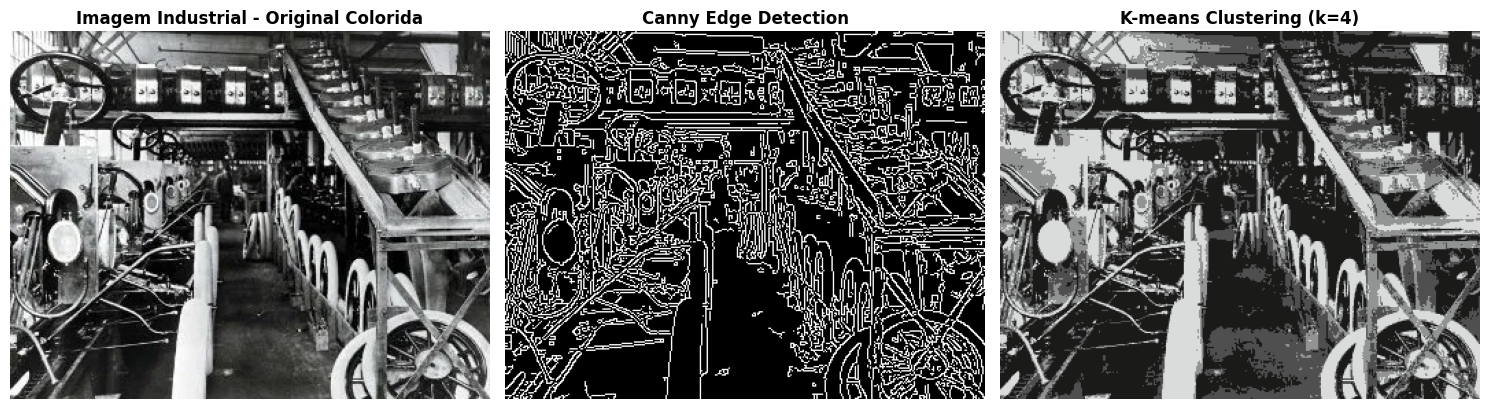

 
ESTATISTICAS - IMAGEM INDUSTRIAL:
Canny:
  Pixels de borda: O algoritmo encontrou 20,928 pixels que ele considera como 'bordas' na imagem
  Densidade de bordas: 22.31% da imagem total foi classificada como borda
K-means:
  Cores unicas: A imagem segmentada agora tem apenas 4 cores
  Clusters utilizados: O algoritmo realmente usou todos os 4 grupos configurados


In [31]:
# Célula 9 - PROCESSAR IMAGEM 3: IMAGEM INDUSTRIAL
print("PROCESSANDO IMAGEM 3: IMAGEM INDUSTRIAL")
print("=" * 50)

caminho_imagem = "/content/img/imagem_industrial.jpg"

if os.path.exists(caminho_imagem):
    # Aplicar Canny
    img_original_canny, img_canny = aplicar_canny(caminho_imagem)

    # Aplicar K-means
    img_original_kmeans, img_kmeans = aplicar_kmeans(caminho_imagem, k=4)

    # Plotar resultados
    plt.figure(figsize=(15, 10))

    # Original
    plt.subplot(2, 3, 1)
    plt.imshow(img_original_kmeans)
    plt.title('Imagem Industrial - Original Colorida', fontsize=12, fontweight='bold')
    plt.axis('off')

    # Canny
    plt.subplot(2, 3, 2)
    plt.imshow(img_canny, cmap='gray')
    plt.title('Canny Edge Detection', fontsize=12, fontweight='bold')
    plt.axis('off')

    # K-means
    plt.subplot(2, 3, 3)
    plt.imshow(img_kmeans)
    plt.title('K-means Clustering (k=4)', fontsize=12, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Estatisticas
    bordas_canny = np.sum(img_canny > 0)
    total_pixels = img_canny.size
    percentual_bordas = (bordas_canny / total_pixels) * 100
    cores_kmeans = len(np.unique(img_kmeans.reshape(-1, img_kmeans.shape[2]), axis=0))

    print(" ")
    print("ESTATISTICAS - IMAGEM INDUSTRIAL:")
    print(f"Canny:")
    print(f"  Pixels de borda: O algoritmo encontrou {bordas_canny:,} pixels que ele considera como 'bordas' na imagem")
    print(f"  Densidade de bordas: {percentual_bordas:.2f}% da imagem total foi classificada como borda")
    print(f"K-means:")
    print(f"  Cores unicas: A imagem segmentada agora tem apenas {cores_kmeans} cores")
    print(f"  Clusters utilizados: O algoritmo realmente usou todos os 4 grupos configurados")

else:
    print("Imagem imagem_industrial.jpg nao encontrada")

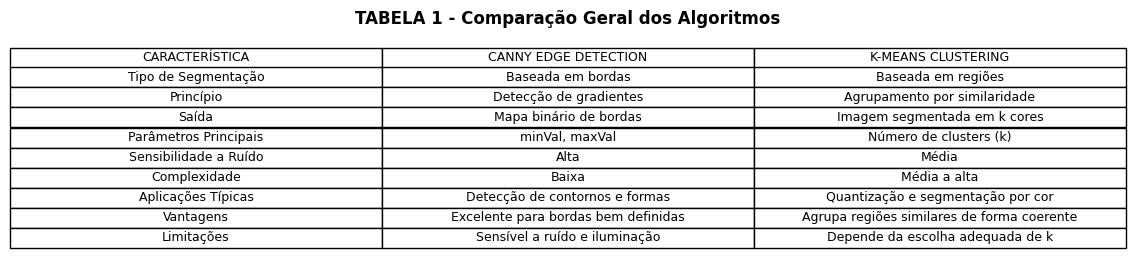

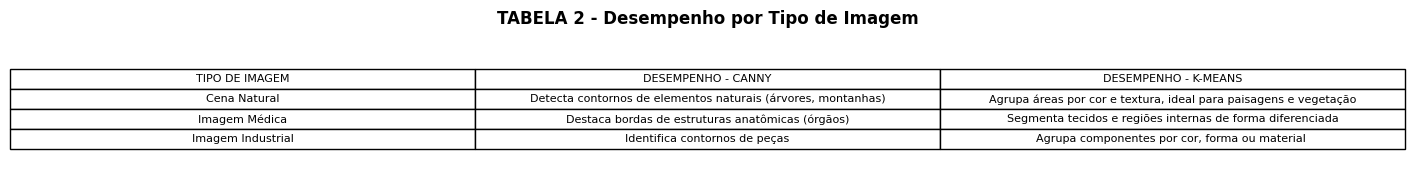

In [32]:
# Célula 11 - TABELAS COMPARATIVAS
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# TABELA 1 - Comparação Geral
# ----------------------------
dados1 = {
    "CARACTERÍSTICA": [
        "Tipo de Segmentação", "Princípio", "Saída",
        "Parâmetros Principais", "Sensibilidade a Ruído",
        "Complexidade", "Aplicações Típicas", "Vantagens", "Limitações"
    ],
    "CANNY EDGE DETECTION": [
        "Baseada em bordas",
        "Detecção de gradientes",
        "Mapa binário de bordas",
        "minVal, maxVal",
        "Alta",
        "Baixa",
        "Detecção de contornos e formas",
        "Excelente para bordas bem definidas",
        "Sensível a ruído e iluminação"
    ],
    "K-MEANS CLUSTERING": [
        "Baseada em regiões",
        "Agrupamento por similaridade",
        "Imagem segmentada em k cores",
        "Número de clusters (k)",
        "Média",
        "Média a alta",
        "Quantização e segmentação por cor",
        "Agrupa regiões similares de forma coerente",
        "Depende da escolha adequada de k"
    ]
}

df1 = pd.DataFrame(dados1)

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
ax.axis('tight')
tabela1 = ax.table(
    cellText=df1.values,
    colLabels=df1.columns,
    cellLoc='center',
    loc='center'
)
tabela1.auto_set_font_size(False)
tabela1.set_fontsize(9)
tabela1.scale(1.2, 1.2)
plt.title("TABELA 1 - Comparação Geral dos Algoritmos", fontweight='bold', fontsize=12)
plt.show()

print(" ")
print(" ")

# ----------------------------
# TABELA 2 - Desempenho por Tipo de Imagem
# ----------------------------
dados2 = {
    "TIPO DE IMAGEM": ["Cena Natural", "Imagem Médica", "Imagem Industrial"],
    "DESEMPENHO - CANNY": [
        "Detecta contornos de elementos naturais (árvores, montanhas)",
        "Destaca bordas de estruturas anatômicas (órgãos)",
        "Identifica contornos de peças"
    ],
    "DESEMPENHO - K-MEANS": [
        "Agrupa áreas por cor e textura, ideal para paisagens e vegetação",
        "Segmenta tecidos e regiões internas de forma diferenciada",
        "Agrupa componentes por cor, forma ou material "
    ]
}

df2 = pd.DataFrame(dados2)

fig, ax = plt.subplots(figsize=(15, 2))
ax.axis('off')
ax.axis('tight')
tabela2 = ax.table(
    cellText=df2.values,
    colLabels=df2.columns,
    cellLoc='center',
    loc='center'
)
tabela2.auto_set_font_size(False)
tabela2.set_fontsize(8)
tabela2.scale(1.2, 1.2)
plt.title("TABELA 2 - Desempenho por Tipo de Imagem", fontweight='bold', fontsize=12)
plt.show()

